In [ ]:
#Data processing

In [1]:
!pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [3]:
minmaxscaler = MinMaxScaler()

In [4]:
!ls -lah '/content/drive/MyDrive/terrain_recognization/dataset'

total 8.0K
drwx------ 2 root root 4.0K Sep 30 06:20 masks_images
drwx------ 2 root root 4.0K Sep 30 06:17 terain_images


In [5]:
dataset_root_folder = '/content/drive/MyDrive/terrain_recognization/'

In [6]:
dataset_name = "dataset"

In [7]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks_images': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.tif')): # '.jpg
        #print(image_name)
        a = True

/content/drive/MyDrive/terrain_recognization/dataset/masks_images


In [8]:
image_patch_size = 256

In [9]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/terain_images/GF2_PMS1__L1A0000564539-MSS1_08.tif',1)

In [10]:
image.shape

(256, 256, 3)

In [11]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [12]:
len(image_patches)

1

In [13]:
print(image_patches.shape)

(1, 1, 1, 256, 256, 3)


In [14]:
minmaxscaler = MinMaxScaler()

In [15]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [16]:
image_y[0].shape

(256, 256, 3)

In [17]:
print(type(image))

<class 'numpy.ndarray'>


In [18]:
type(Image.fromarray(image))

PIL.Image.Image

In [19]:
image.shape

(256, 256, 3)

In [20]:
(image.shape[0]//image_patch_size)*image_patch_size

256

In [21]:
#Processing images

In [22]:
image_dataset = []
mask_dataset = []

for image_type in ['terain_images' , 'masks_images']:
  if image_type == 'terain_images':
    image_extension = 'tif'
  elif image_type == 'masks_images':
     image_extension = 'tif'

  for image_id in range(1,20):
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/{image_type}/GF2_PMS1__L1A0000564539-MSS1_0{image_id}.{image_extension}',1)
    if image is not None:
      if image_type == 'masks_images':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))
      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))
      image = np.array(image)
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #print(len(patched_images))
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          if image_type == 'terain_images':
            individual_patched_image = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape)
            image_dataset.append(individual_patched_image)
          elif image_type == 'masks_images':
            individual_patched_mask = patched_images[i,j,:,:]
            individual_patched_mask = individual_patched_mask[0]
            mask_dataset.append(individual_patched_mask)

In [23]:
print(len(image_dataset))
print(len(mask_dataset))


10
10


In [24]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [25]:
print(len(image_dataset))
print(len(mask_dataset))

10
10


In [26]:
type(image_dataset[0])

numpy.ndarray

In [27]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

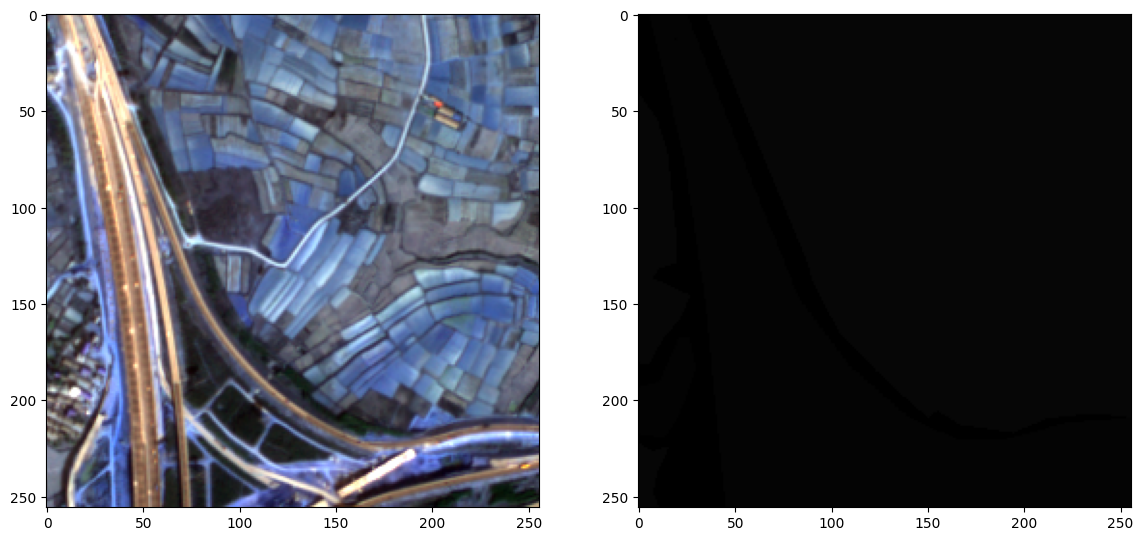

In [28]:
random_image_id = random.randint(0, len(image_dataset-1))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

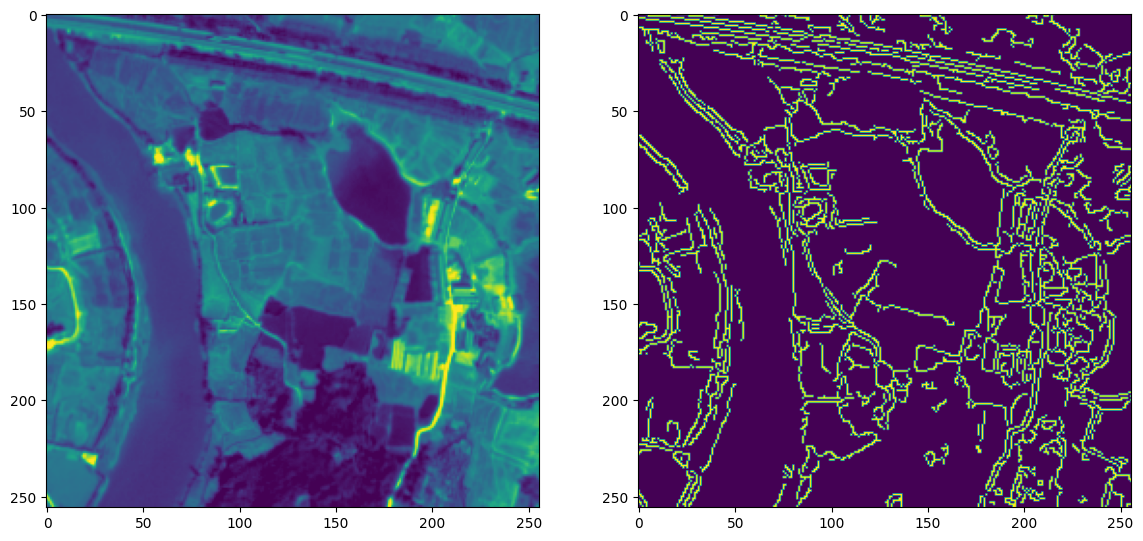

In [33]:
image_type = 'terain_images'
image_extension = 'tif'
random_image_id = random.randint(8, 17)
img = cv2.imread(f'{dataset_root_folder}/{dataset_name}/{image_type}/GF2_PMS1__L1A0000564539-MSS1_0{random_image_id}.{image_extension}',0)
edges = cv2.Canny(img,100,200)
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(edges)

In [34]:
from tensorflow.keras.utils import to_categorical

In [37]:
master_trianing_dataset.shape

(10, 256, 256, 3)

In [36]:
master_trianing_dataset = image_dataset

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test = train_test_split(master_trianing_dataset, test_size=0.15, random_state=100)

In [40]:
print(X_train.shape)
print(X_test.shape)

(8, 256, 256, 3)
(2, 256, 256, 3)


In [41]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]

In [42]:
print(image_height)
print(image_width)
print(image_channels)

256
256
3
